In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import seaborn as sns

%matplotlib inline

In [2]:
file_path = '/content/IRIS.csv'
iris_df = pd.read_csv(file_path)

In [3]:
iris_df.info()
iris_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
print("Missing Values:\n", iris_df.isnull().sum())

Missing Values:
 sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


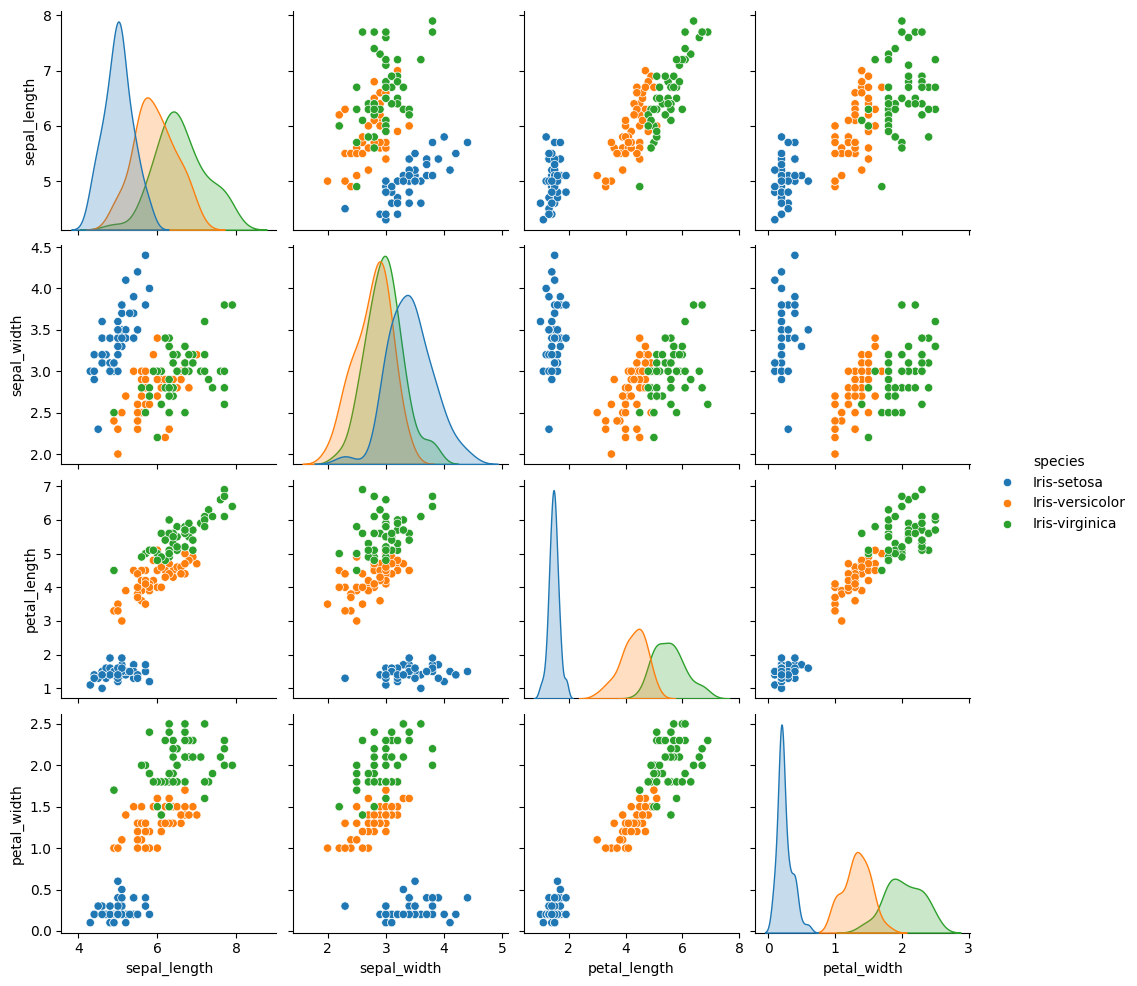

In [5]:
iris_df.describe()

sns.pairplot(iris_df, hue='species', diag_kind='kde')
plt.show()

In [6]:
X = iris_df.drop('species', axis=1)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled_df.head()

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


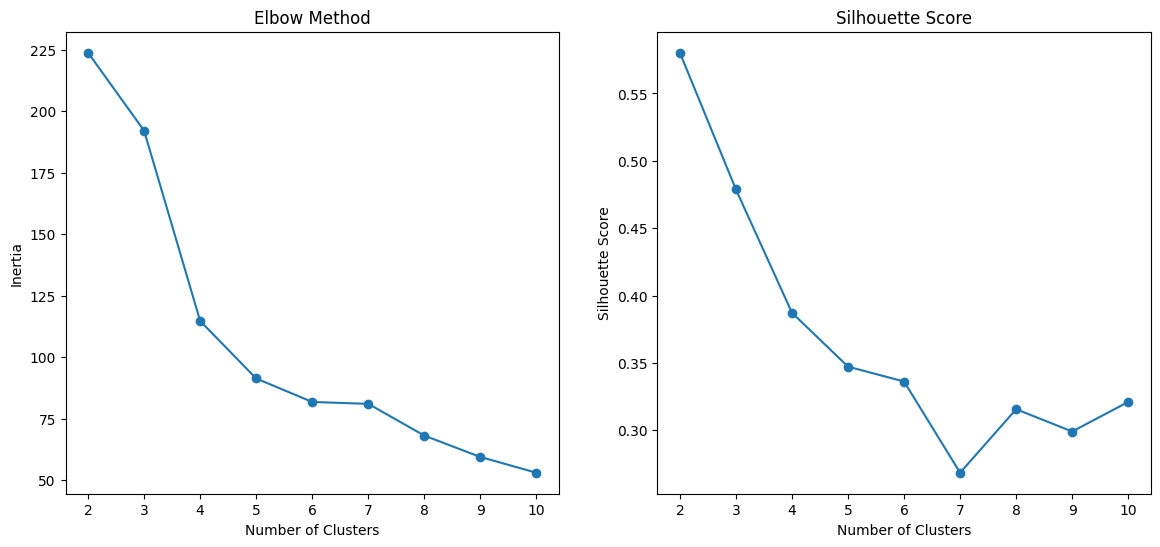

In [7]:
cluster_range = range(2, 11)
inertia_list = []
silhouette_list = []

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia_list.append(kmeans.inertia_)
    silhouette_avg = silhouette_score(X_scaled, kmeans.labels_)
    silhouette_list.append(silhouette_avg)

fig, ax = plt.subplots(1, 2, figsize=(14, 6))

ax[0].plot(cluster_range, inertia_list, marker='o')
ax[0].set_title('Elbow Method')
ax[0].set_xlabel('Number of Clusters')
ax[0].set_ylabel('Inertia')

ax[1].plot(cluster_range, silhouette_list, marker='o')
ax[1].set_title('Silhouette Score')
ax[1].set_xlabel('Number of Clusters')
ax[1].set_ylabel('Silhouette Score')

plt.show()

optimal_k = 3
kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_optimal.fit(X_scaled)

iris_df['Cluster'] = kmeans_optimal.labels_

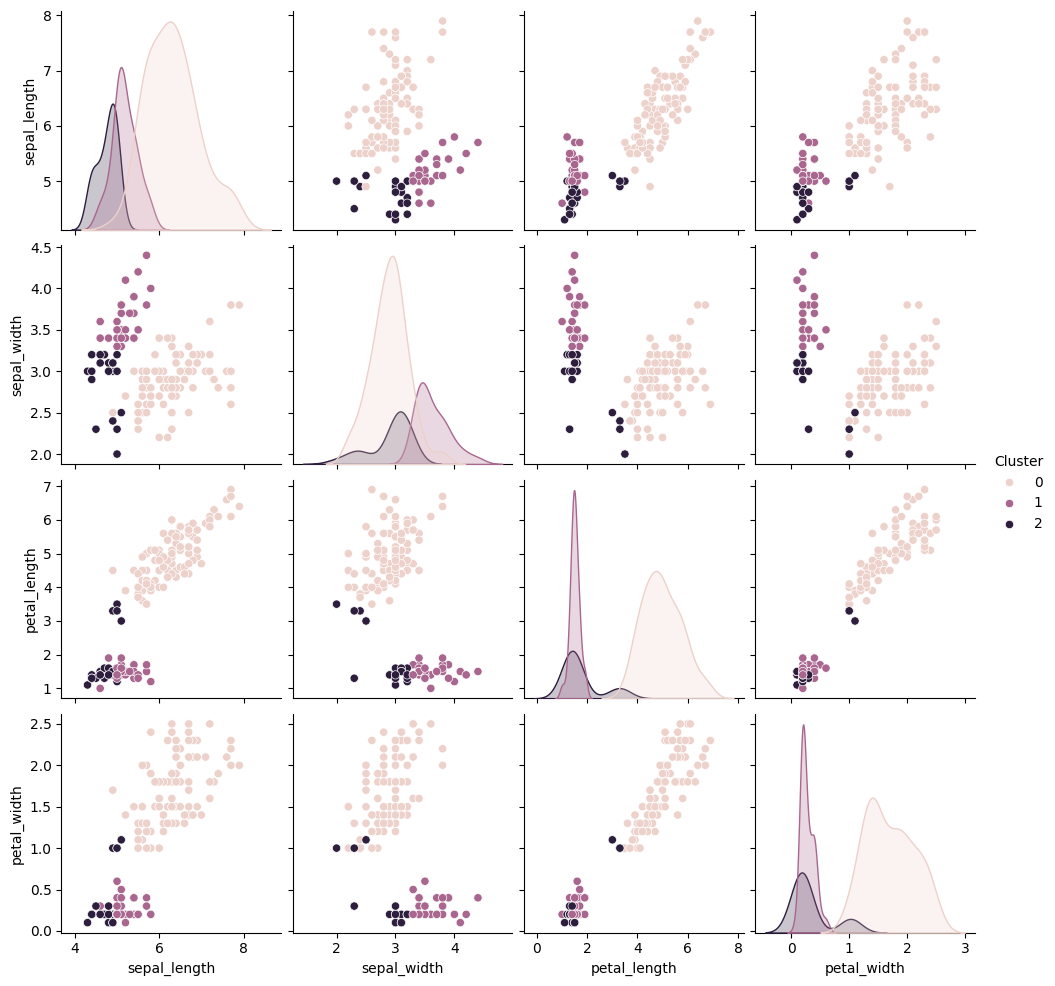

Silhouette Score for 3 Clusters: 0.4787241921049546


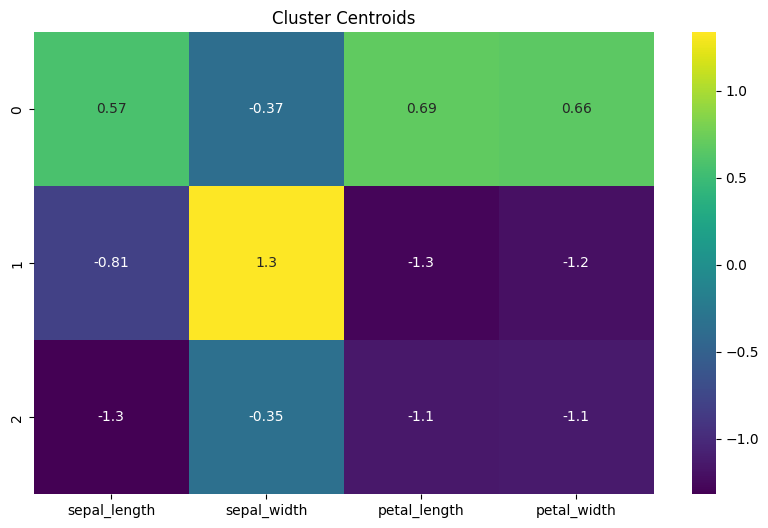

In [8]:
sns.pairplot(iris_df, hue='Cluster', diag_kind='kde')
plt.show()

silhouette_avg_optimal = silhouette_score(X_scaled, kmeans_optimal.labels_)
print(f'Silhouette Score for {optimal_k} Clusters: {silhouette_avg_optimal}')

centroids = kmeans_optimal.cluster_centers_
centroids_df = pd.DataFrame(centroids, columns=X.columns)

plt.figure(figsize=(10, 6))
sns.heatmap(centroids_df, annot=True, cmap='viridis')
plt.title('Cluster Centroids')
plt.show()